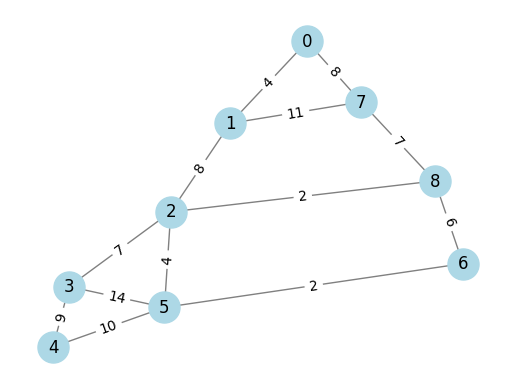

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# utilizam 2 grafuri neorientate (undirected): G (unweighted), GT (weighted)
G=nx.path_graph(5)
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html
# Create a graph GT
GT = nx.Graph()  # create an empty graph
GT.add_edges_from(
    [
        (0, 1, {"weight": 4}),
        (0, 7, {"weight": 8}),
        (1, 7, {"weight": 11}),
        (1, 2, {"weight": 8}),
        (2, 8, {"weight": 2}),
        (2, 5, {"weight": 4}),
        (2, 3, {"weight": 7}),
        (3, 4, {"weight": 9}),
        (3, 5, {"weight": 14}),
        (4, 5, {"weight": 10}),
        (5, 6, {"weight": 2}),
        (6, 8, {"weight": 6}),
        (7, 8, {"weight": 7}),
    ]
)

# Visualize the graph
# https://networkx.org/documentation/stable/reference/drawing.html
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(GT)
nx.draw_networkx_nodes(GT, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(GT, pos, edge_color="grey")
nx.draw_networkx_labels(GT, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    GT, pos, edge_labels={(u, v): d["weight"] for u, v, d in GT.edges(data=True)}
)
plt.axis("off")
plt.show()


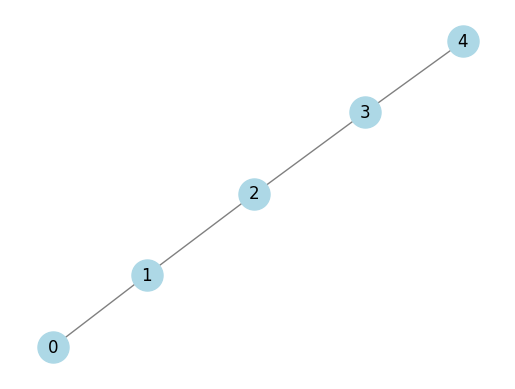

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# utilizam 2 grafuri create G fara cost (fara weights)
# total path length "cost" cardinalul nodurior==nr. noduri parcurse
G=nx.path_graph(5)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis("off")
plt.show()


In [50]:
# https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path

print(" Shortest Path Dijkstra Algorithm ")
p  = nx.shortest_path(G, source=0, target=4)
print("G  graph: source=0, target=4 result:",p)

pGT= nx.shortest_path(GT,source=0, target=4)
print("GT graph: source=0, target=4 result:",pGT)

print(" ")

p  =nx.shortest_path(G, source=0)# target not specified
print("G  graph:  source=0, target 3: p[3]=",p[3]  )# shortest path from source=0 to target=3

pGT=nx.shortest_path(GT,source=0)# target not specified
print("GT graph: source=0, target 3: p[3]=", pGT[3])# shortest path from source=0 to target=3

print(" ")

p  =nx.shortest_path(G, target=4)# source not specified
print("G  graph: target=4 source=1: p[1]=",p[1]) # shortest path from source=1 to target=4

pGT=nx.shortest_path(GT,target=4)# source not specified
print("GT graph: target=4 source=1: p[1]=",pGT[1]) # shortest path from source=1 to target=4

print(" ")

p  =nx.shortest_path(G)# source, target not specified
print("G  graph: target=4 source=2: p[2][4]=",p[2][4])# shortest path from source=2 to target=4

pGT=nx.shortest_path(GT)# source, target not specified
print("GT graph: target=4 source=2: p[2][4]=",pGT[2][4])# shortest path from source=2 to target=4

 Shortest Path Dijkstra Algorithm 
G  graph: source=0, target=4 result: [0, 1, 2, 3, 4]
GT graph: source=0, target=4 result: [0, 1, 2, 5, 4]
 
G  graph:  source=0, target 3: p[3]= [0, 1, 2, 3]
GT graph: source=0, target 3: p[3]= [0, 1, 2, 3]
 
G  graph: target=4 source=1: p[1]= [1, 2, 3, 4]
GT graph: target=4 source=1: p[1]= [1, 2, 3, 4]
 
G  graph: target=4 source=2: p[2][4]= [2, 3, 4]
GT graph: target=4 source=2: p[2][4]= [2, 5, 4]


In [51]:
# All pairs Short Path (APSP)
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path_length.html#networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path_length

p  =dict(nx.all_pairs_shortest_path_length(G))

pGT=dict(nx.all_pairs_shortest_path_length(GT))

print("Graph G: All pairs Short Path (APSP)")
for node in [0, 1, 2, 3, 4]:print(f"1 - {node}: {p[1][node]}")
print("3->1: ",p[3][1])
for node in [0, 1, 2, 3, 4]:print(f"3 - {node}: {p[3][node]}")

print("Graph GT: All pairs Short Path (APSP)")
for node in [0, 1, 2, 3, 4, 5]:print(f"1 - {node}: {pGT[1][node]}")
print("3->1: ",pGT[3][1])
print("3->5: ",pGT[3][5])
for node in [0, 1, 2, 3, 4, 5]:print(f"3 - {node}: {pGT[3][node]}")


Graph G: All pairs Short Path (APSP)
1 - 0: 1
1 - 1: 0
1 - 2: 1
1 - 3: 2
1 - 4: 3
3->1:  2
3 - 0: 3
3 - 1: 2
3 - 2: 1
3 - 3: 0
3 - 4: 1
Graph GT: All pairs Short Path (APSP)
1 - 0: 1
1 - 1: 0
1 - 2: 1
1 - 3: 2
1 - 4: 3
1 - 5: 2
3->1:  2
3->5:  1
3 - 0: 3
3 - 1: 2
3 - 2: 1
3 - 3: 0
3 - 4: 1
3 - 5: 1


In [52]:
# Single Source Shortest Path (SSSP)
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path.html#networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path_length.html#networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path_length

p   = nx.single_source_shortest_path(G,  0)
pGT = nx.single_source_shortest_path(GT, 0)

print("G  graph: SSSP shortest path source=0 target 4: ",p[4])
print("GT graph: SSSP shortest path source=0 target 4: ",pGT[4])

plength  = nx.single_source_shortest_path_length(G,  0)
pGTlength= nx.single_source_shortest_path_length(GT, 0)
print("G: SSSP shortest path source=0 target 4: lungime shortest path: ",plength[4])
print("GT:SSSP shortest path source=0 target 4: lungime shortest path: ",pGTlength[4])

print("G graph SSSP")
for node in plength:print(f"{node}: {plength[node]}")

print("GT graph SSSP")
for node in pGTlength:print(f"{node}: {pGTlength[node]}")


G  graph: SSSP shortest path source=0 target 4:  [0, 1, 2, 3, 4]
GT graph: SSSP shortest path source=0 target 4:  [0, 1, 2, 5, 4]
G: SSSP shortest path source=0 target 4: lungime shortest path:  4
GT:SSSP shortest path source=0 target 4: lungime shortest path:  4
G graph SSSP
0: 0
1: 1
2: 2
3: 3
4: 4
GT graph SSSP
0: 0
1: 1
7: 1
2: 2
8: 2
5: 3
3: 3
6: 3
4: 4


In [53]:
# Single Source Shortest Path (SSSP) Djikstra
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra
# SSSP Djiktra just with source
plength, p = nx.single_source_dijkstra(G, 0)
print("G graph: lungime SSSP Djikstra 0->4 ",plength[4])

pGTlength, pGT = nx.single_source_dijkstra(GT, 0)
print("G graph: lungime SSSP Djikstra:0->3 ",plength[3])

print(" ")

for node in [0, 1, 2, 3, 4]:print(f"{node}: {plength[node]}")
print("G  graph: SSSP Djikstra",p[4])

print(" ")

print("GT graph: lungime SSSP Djikstra 0->4 ",pGTlength[4])
print("GT graph: lungime SSSP Djikstra:0->3 ",pGTlength[3])

for node in [0, 1, 2, 3, 4, 5, 6, 7, 8]:print(f"{node}: {pGTlength[node]}")
print("GT graph: SSSP Djikstra",pGT[4])

print(" ")
# SSSP Djiktra with source and target
plength, p = nx.single_source_dijkstra(G, 0, 1)
print("SSSP Djikstra maxim target 1", p[1] )

# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra_path.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra_path
p = nx.single_source_dijkstra_path(G, 0)
print("SSSP Djikstra, target 4 p[4] ", p[4])

pGTlength, pGT = nx.single_source_dijkstra(GT, 0, 1)
print("GT graph: SSSP Djikstra maxim target 1 ", pGT[1] )

pGT = nx.single_source_dijkstra_path(GT, 0)
print("GT graph: SSSP Djikstra target 4 ", pGT[4])



G graph: lungime SSSP Djikstra 0->4  4
G graph: lungime SSSP Djikstra:0->3  3
 
0: 0
1: 1
2: 2
3: 3
4: 4
G  graph: SSSP Djikstra [0, 1, 2, 3, 4]
 
GT graph: lungime SSSP Djikstra 0->4  26
GT graph: lungime SSSP Djikstra:0->3  19
0: 0
1: 4
2: 12
3: 19
4: 26
5: 16
6: 18
7: 8
8: 14
GT graph: SSSP Djikstra [0, 1, 2, 5, 4]
 
SSSP Djikstra maxim target 1 1
SSSP Djikstra, target 4 p[4]  [0, 1, 2, 3, 4]
GT graph: SSSP Djikstra maxim target 1  1
GT graph: SSSP Djikstra target 4  [0, 1, 2, 5, 4]


Find the minimum spanning tree


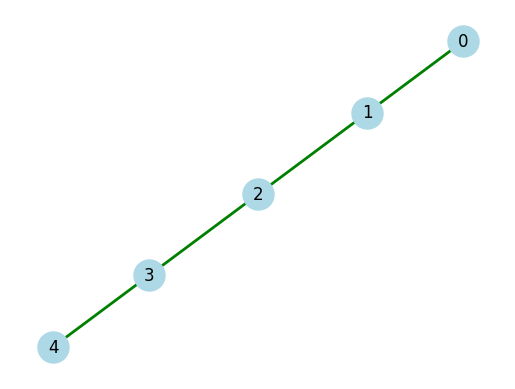

In [61]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html

# Find the minimum spanning tree
# Culoare verde MST

print("Find the minimum spanning tree")
TG = nx.minimum_spanning_tree(G)

# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

nx.draw_networkx_edges(TG, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

Find the minimum spanning tree


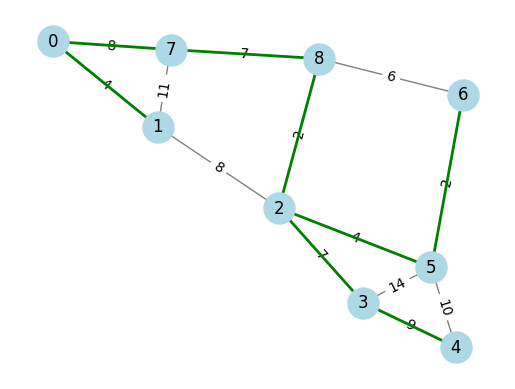

In [62]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html
# Find the minimum spanning tree
# Culoare verde MST

print("Find the minimum spanning tree")

T = nx.minimum_spanning_tree(GT)
# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(GT)
nx.draw_networkx_nodes(GT, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(GT, pos, edge_color="grey")
nx.draw_networkx_labels(GT, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    GT, pos, edge_labels={(u, v): d["weight"] for u, v, d in GT.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()
